In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
# Load the data into a DataFrame

reds =pd.read_csv('red_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='ansi')

reds['idname'] = reds.name + ' - ' + reds.year + ' - ' + reds.company

df = reds.set_index('idname')

df.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
idname,,,,,,,,,,,,,,
Sotirio - 2011 - Podernuovo a Palazzone,Podernuovo a Palazzone,Sotirio,4.3,75,32.90,Manzo / Agnello / Vitello,Italia,Toscana,Merlot,2011,56.4560,45.1866,3.85000,legno/Erbaceo/bacche nere
Pieve Santa Restituta Sugarille Brunello di Montalcino - 2016 - Gaja,Gaja,Pieve Santa Restituta Sugarille Brunello di Mo...,4.3,27,179.00,"Manzo / Agnello / Cacciagione (cervo, camoscio)",Italia,Brunello di Montalcino,Sangiovese,2016,52.7566,58.8874,10.60680,legno/Erbaceo/frutti rossi
Paleo - 2017 - Le Macchiole,Le Macchiole,Paleo,4.5,301,109.00,Manzo / Agnello / Vitello,Italia,Toscana,Cabernet Franc,2017,58.2530,49.4875,13.64230,legno/bacche nere/Erbaceo
Sassicaia - 2000 - Tenuta San Guido,Tenuta San Guido,Sassicaia,4.6,2174,569.25,Manzo / Pasta / Agnello,Italia,Bolgheri Sassicaia,Miscela,2000,62.0472,64.0325,10.29500,legno/bacche nere/Erbaceo
Cerretta Barolo Riserva (Vigna Bricco) - 2013 - Elio Altare,Elio Altare,Cerretta Barolo Riserva (Vigna Bricco),4.4,153,161.00,Manzo / Pasta / Agnello,Italia,Barolo,Nebbiolo,2013,63.0586,82.5967,7.25151,Erbaceo/legno/frutti rossi


In [3]:
# Create a copy of the DataFrame for clustering

df_cl = df.copy()

df_cl = df_cl.dropna()


df_cl.drop(columns=['name', 'company', 'avg_review', 'num_review', 'food_advice', 'country', 'region', 'year'], inplace=True)

In [4]:
# Create a copy of the DataFrame for later use

df_cl_original = df_cl.copy()

In [5]:
# Extract unique notes from the 'notes' column

notes = set()

for row in df_cl.notes:
    for note in row.split('/'):
        notes.add(note)
        
# One-hot encode the notes

for note in notes:
    col = []
    for row in df_cl.notes.to_list():
        if note in row:
            col.append(1)
        else:
            col.append(0)
    df_cl['Note: '+ note] = col

In [6]:
# Drop the original 'notes' column

df_cl.drop(columns=['notes'], inplace=True)

,price,wine_type,legg_strutt,secco_dolce,piatto_acid,Note: albero da frutta,Note: frutti rossi,Note: spezie,Note: legno,Note: bacche nere,Note: Floreale,Note: Erbaceo,Note: Invecchiamento,Note: frutta secca,Note: agrume
idname,,,,,,,,,,,,,,,
Sotirio - 2011 - Podernuovo a Palazzone,32.90,Merlot,56.4560,45.1866,3.85000,0,0,0,1,1,0,1,0,0,0
Pieve Santa Restituta Sugarille Brunello di Montalcino - 2016 - Gaja,179.00,Sangiovese,52.7566,58.8874,10.60680,0,1,0,1,0,0,1,0,0,0
Paleo - 2017 - Le Macchiole,109.00,Cabernet Franc,58.2530,49.4875,13.64230,0,0,0,1,1,0,1,0,0,0
Sassicaia - 2000 - Tenuta San Guido,569.25,Miscela,62.0472,64.0325,10.29500,0,0,0,1,1,0,1,0,0,0
Cerretta Barolo Riserva (Vigna Bricco) - 2013 - Elio Altare,161.00,Nebbiolo,63.0586,82.5967,7.25151,0,1,0,1,0,0,1,0,0,0


In [7]:
# Scale the 'legg_strutt', 'secco_dolce', and 'piatto_acid' columns

df_cl['legg_strutt'] = df_cl['legg_strutt'].div(100).round(3)
df_cl['secco_dolce'] = df_cl['secco_dolce'].div(100).round(3)
df_cl['piatto_acid'] = df_cl['piatto_acid'].div(100).round(3)

In [8]:
#Get list of categorical variables
s = (df_cl.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['wine_type']


In [11]:
# Label encode the categorical variables
L_E=LabelEncoder()
for i in object_cols:
    df_cl[i]=df_cl[[i]].apply(L_E.fit_transform)

In [8]:
# One Hot Encoding of categorical variables
df_cl = pd.get_dummies(df_cl)
df_cl.head()

,price,legg_strutt,secco_dolce,piatto_acid,Note: albero da frutta,Note: frutti rossi,Note: spezie,Note: legno,Note: bacche nere,Note: Floreale,...,wine_type_Raboso Piave,wine_type_Refosco dal Peduncolo rosso,wine_type_Riesling,wine_type_Rondinella,wine_type_Sagrantino,wine_type_Sangiovese,wine_type_Schioppettino,wine_type_Shiraz/Syrah,wine_type_Teroldego,wine_type_Vermentino
idname,,,,,,,,,,,,,,,,,,,,,
Sotirio - 2011 - Podernuovo a Palazzone,32.90,0.565,0.452,0.038,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Pieve Santa Restituta Sugarille Brunello di Montalcino - 2016 - Gaja,179.00,0.528,0.589,0.106,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Paleo - 2017 - Le Macchiole,109.00,0.583,0.495,0.136,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Sassicaia - 2000 - Tenuta San Guido,569.25,0.620,0.640,0.103,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Cerretta Barolo Riserva (Vigna Bricco) - 2013 - Elio Altare,161.00,0.631,0.826,0.073,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Scale the DataFrame using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_cl)
scaled_df_cl = pd.DataFrame(scaler.transform(df_cl),columns= df_cl.columns )
scaled_df_cl

,price,legg_strutt,secco_dolce,piatto_acid,Note: albero da frutta,Note: frutti rossi,Note: spezie,Note: legno,Note: bacche nere,Note: Floreale,...,wine_type_Raboso Piave,wine_type_Refosco dal Peduncolo rosso,wine_type_Riesling,wine_type_Rondinella,wine_type_Sagrantino,wine_type_Sangiovese,wine_type_Schioppettino,wine_type_Shiraz/Syrah,wine_type_Teroldego,wine_type_Vermentino
0,0.008781,0.450867,0.441795,0.066318,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.059291,0.379576,0.633941,0.184991,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.035091,0.485549,0.502104,0.237347,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.194209,0.556840,0.705470,0.179756,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.053068,0.578035,0.966339,0.127400,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.013656,0.969171,0.145863,0.874346,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.012792,0.483622,0.267882,0.322862,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.022645,0.229287,0.646564,0.188482,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1997,0.121521,0.526012,0.854137,0.249564,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Elbow Method to determine the number of clusters to be formed:


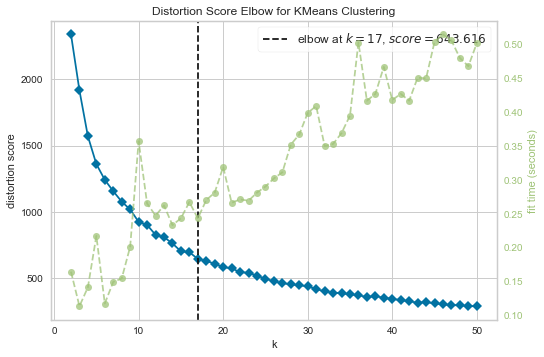

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Use the elbow method to determine the optimal number of clusters

print('Elbow Method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMeans(), k=50)
Elbow.fit(scaled_df_cl) #scaled_df_cl
Elbow.show()

Silhouette Coefficient to determine the number of clusters to be formed:


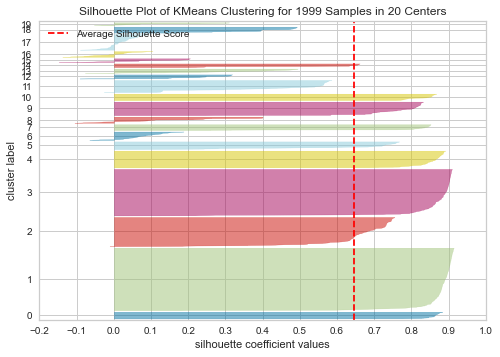

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1999 Samples in 20 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Use the silhouette coefficient to determine the optimal number of clusters

print('Silhouette Coefficient to determine the number of clusters to be formed:')
visualizer = SilhouetteVisualizer(KMeans(n_clusters=20), colors='yellowbrick')
visualizer.fit(scaled_df_cl)
visualizer.show()

Intercluster Distance to visualize distance between clusters:


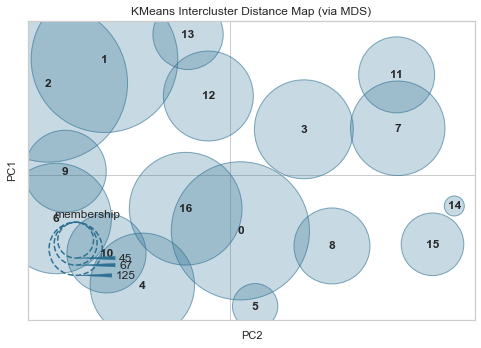

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [13]:
# Visualize the distance between clusters

print('Intercluster Distance to visualize distance between clusters:')
inter_dis = InterclusterDistance(KMeans(n_clusters=17))
inter_dis.fit(scaled_df_cl)
inter_dis.show()

In [14]:
# Perform k-means clustering for various values of k and calculate the silhouette score for each

for i in range(10, 18, 1):
    kmeans = KMeans(n_clusters=i, n_init=100, max_iter=500)
    clusters = kmeans.fit_predict(scaled_df_cl)
    print('Cluster k: ', i)
    print('Silhouette %s' % silhouette_score(scaled_df_cl, kmeans.labels_))

Cluster k:  10
Silhouette 0.5639023136565132
Cluster k:  11
Silhouette 0.5867865904315586
Cluster k:  12
Silhouette 0.5944359815854481
Cluster k:  13
Silhouette 0.6043220964822608
Cluster k:  14
Silhouette 0.6168373245099044
Cluster k:  15
Silhouette 0.6282614095776481
Cluster k:  16
Silhouette 0.6195671915636419
Cluster k:  17
Silhouette 0.6466221379008874


In [10]:
# Perform k-means clustering with the optimal number of clusters

kmeans = KMeans(n_clusters=17, n_init=100, max_iter=500)
clusters = kmeans.fit_predict(scaled_df_cl)
df_cl_original["Clusters"]= clusters

In [12]:
# Print the silhouette score of the final clustering

print('Silhouette %s' % silhouette_score(scaled_df_cl, kmeans.labels_))

Silhouette 0.6336460363472495


In [13]:
# Print the size of each cluster

hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(scaled_df_cl)))

Cluster 0: 22 (0.01)
Cluster 1: 465 (0.23)
Cluster 2: 140 (0.07)
Cluster 3: 344 (0.17)
Cluster 4: 229 (0.11)
Cluster 5: 100 (0.05)
Cluster 6: 44 (0.02)
Cluster 7: 125 (0.06)
Cluster 8: 75 (0.04)
Cluster 9: 50 (0.03)
Cluster 10: 57 (0.03)
Cluster 11: 51 (0.03)
Cluster 12: 49 (0.02)
Cluster 13: 57 (0.03)
Cluster 14: 68 (0.03)
Cluster 15: 78 (0.04)
Cluster 16: 45 (0.02)


In [14]:
df_cl_original.head()

,price,wine_type,legg_strutt,secco_dolce,piatto_acid,notes,Clusters
idname,,,,,,,
Sotirio - 2011 - Podernuovo a Palazzone,32.90,Merlot,56.4560,45.1866,3.85000,legno/Erbaceo/bacche nere,5
Pieve Santa Restituta Sugarille Brunello di Montalcino - 2016 - Gaja,179.00,Sangiovese,52.7566,58.8874,10.60680,legno/Erbaceo/frutti rossi,3
Paleo - 2017 - Le Macchiole,109.00,Cabernet Franc,58.2530,49.4875,13.64230,legno/bacche nere/Erbaceo,2
Sassicaia - 2000 - Tenuta San Guido,569.25,Miscela,62.0472,64.0325,10.29500,legno/bacche nere/Erbaceo,4
Cerretta Barolo Riserva (Vigna Bricco) - 2013 - Elio Altare,161.00,Nebbiolo,63.0586,82.5967,7.25151,Erbaceo/legno/frutti rossi,1


In [18]:
# Save the DataFrame with cluster assignments to a CSV file

df_cl_original.to_csv('df_clustering_reds.csv', sep=',')